part 0: data and liabriaries

In [68]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("data.csv")

part 1: laptop's prices


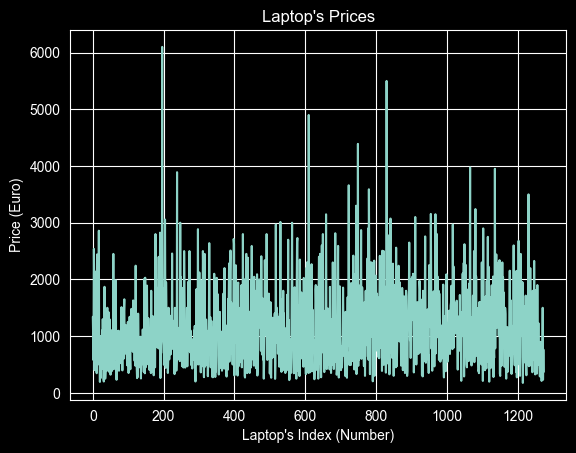

In [69]:
plt.title("Laptop's Prices")
plt.xlabel("Laptop's Index (Number)")
sns.lineplot(df, x = df.index , y = "Price (Euro)")
plt.show()

part 2: the most expensive laptop and company's avarage

In [70]:
avarage_price = df.groupby("Company")["Price (Euro)"]
print(avarage_price.mean().sort_values(ascending=False)) #a sorted series of the avarage price of each company, from the most expensive to the cheapest

Company
Razer        3346.142857
LG           2099.000000
MSI          1728.908148
Google       1677.666667
Microsoft    1612.308333
Apple        1564.198571
Huawei       1424.000000
Samsung      1413.444444
Toshiba      1267.812500
Dell         1199.225120
Xiaomi       1133.462500
Asus         1123.829737
Lenovo       1093.862215
HP           1080.314664
Fujitsu       729.000000
Acer          633.464455
Chuwi         314.296667
Mediacom      295.000000
Vero          217.425000
Name: Price (Euro), dtype: float64


part 3: types of operating system
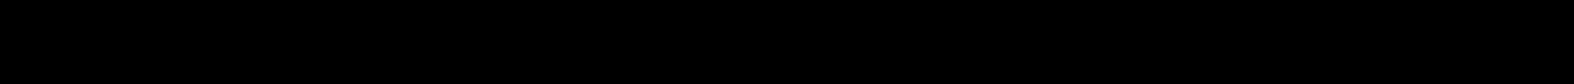
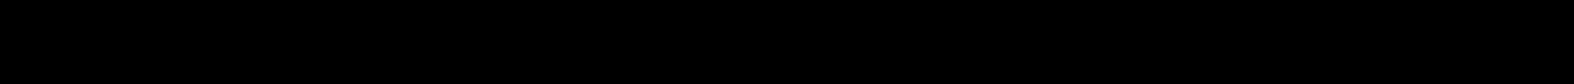
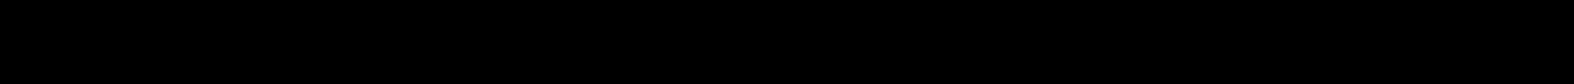

In [71]:
OpSys = df.OpSys.unique()
print(OpSys) #an array of the operating systems, without duplication
df["fixed_OpSys"] = df["OpSys"].copy()
#changing the same operating systems that are written differently:
df["fixed_OpSys"] = df["fixed_OpSys"].replace(["macOS", "Mac OS X"], "Mac")
df["fixed_OpSys"] = df["fixed_OpSys"].replace(["Windows 10", "Windows 10 S", "Windows 7"], "Windows")
print(df.fixed_OpSys.unique()) #a fixed array of all the operating system, without duplications

['macOS' 'No OS' 'Windows 10' 'Mac OS X' 'Linux' 'Android' 'Windows 10 S'
 'Chrome OS' 'Windows 7']
['Mac' 'No OS' 'Windows' 'Linux' 'Android' 'Chrome OS']


part 4: operating system's prices
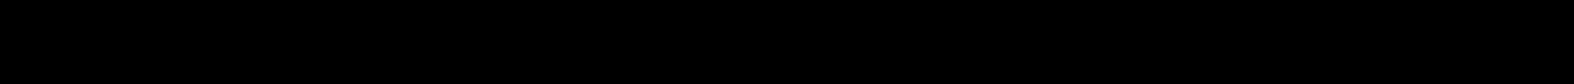

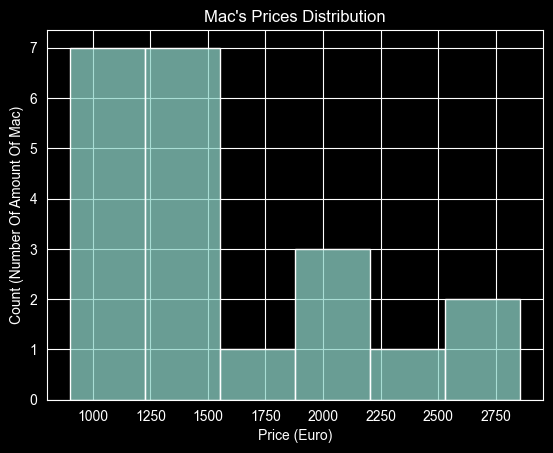

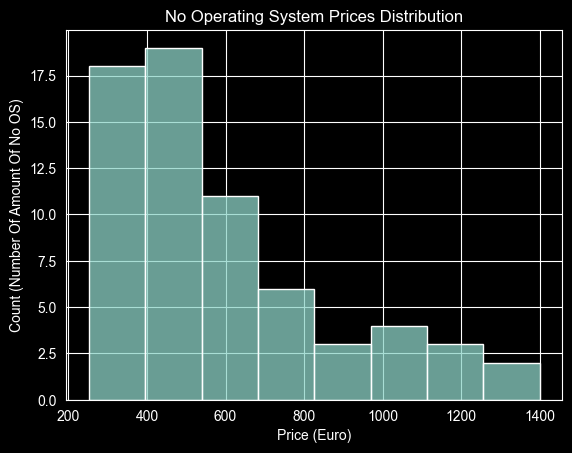

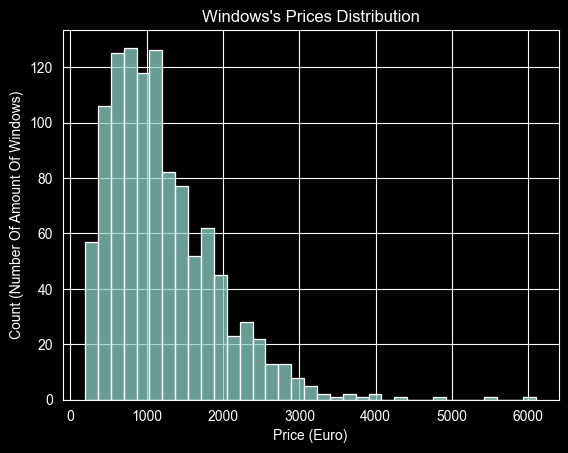

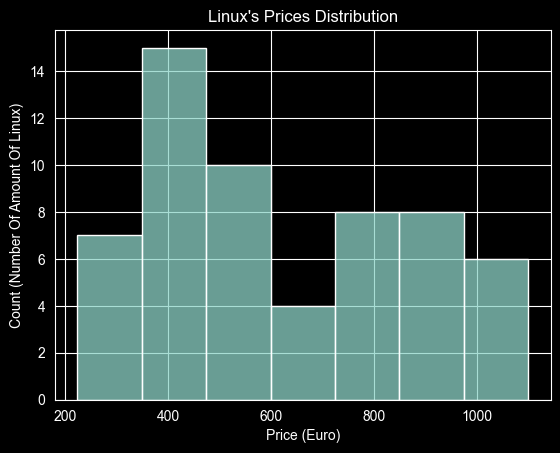

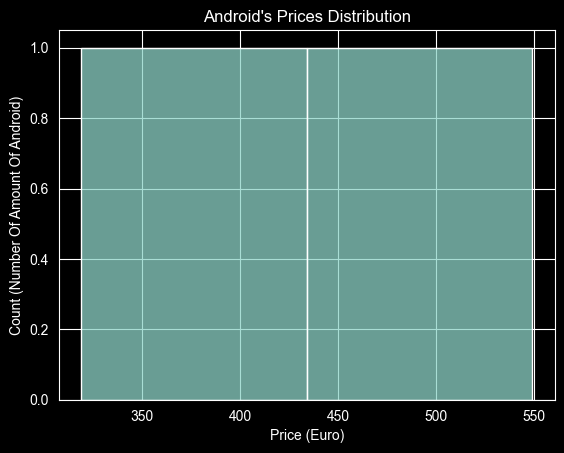

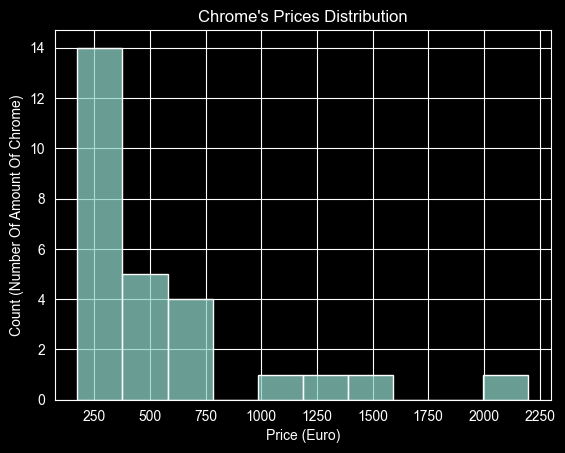

In [72]:
Mac_price = df.loc[df["fixed_OpSys"] == "Mac", "Price (Euro)"]
plt.title("Mac's Prices Distribution")
plt.ylabel("Count (Number Of Amount Of Mac)")
sns.histplot(Mac_price)
plt.show()
No_OS_price = df.loc[df["fixed_OpSys"] == "No OS", "Price (Euro)"]
plt.title("No Operating System Prices Distribution")
plt.ylabel("Count (Number Of Amount Of No OS)")
sns.histplot(No_OS_price)
plt.show()
Windows_price = df.loc[df["fixed_OpSys"] == "Windows", "Price (Euro)"]
plt.title("Windows's Prices Distribution")
plt.ylabel("Count (Number Of Amount Of Windows)")
sns.histplot(Windows_price)
plt.show()
Linux_price = df.loc[df["fixed_OpSys"] == "Linux", "Price (Euro)"]
plt.title("Linux's Prices Distribution")
plt.ylabel("Count (Number Of Amount Of Linux)")
sns.histplot(Linux_price)
plt.show()
Android_price = df.loc[df["fixed_OpSys"] == "Android", "Price (Euro)"]
plt.title("Android's Prices Distribution")
plt.ylabel("Count (Number Of Amount Of Android)")
sns.histplot(Android_price)
plt.show()
Chrome_OS_price = df.loc[df["fixed_OpSys"] == "Chrome OS", "Price (Euro)"]
plt.title("Chrome's Prices Distribution")
plt.ylabel("Count (Number Of Amount Of Chrome)")
sns.histplot(Chrome_OS_price)
plt.show()

part 5: Ram and Price

0.7642484695916761


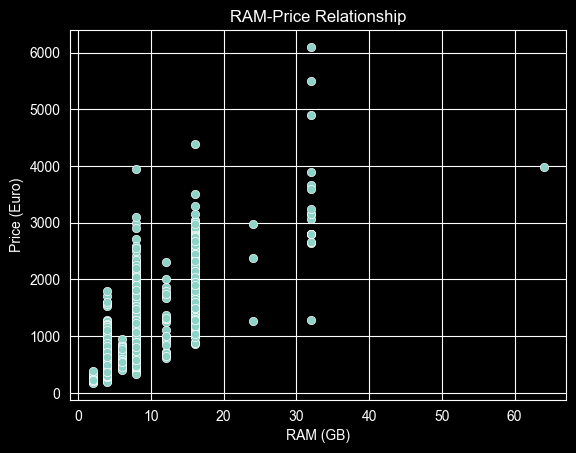

0.7491318448805337


In [73]:
#Spearman Correlation will show the relationship between "RAM" and "Price":
print(df["RAM (GB)"].corr(df["Price (Euro)"], method = "spearman"))
#there is a positive correlation between the 2 variables- as RAM increases, the price increases
#scatter plot will show best the relationship between "RAM" and "Price":
sns.scatterplot(data= df, x = "RAM (GB)", y = "Price (Euro)")
plt.title("RAM-Price Relationship")
plt.show()

#search for "RAM" outliers:
R_Q1 = df["RAM (GB)"].quantile(0.25)
R_Q3 = df["RAM (GB)"].quantile(0.75)
R_IQR = R_Q3 - R_Q1
R_lower = R_Q1 - 3 * R_IQR #"RAM" is a discrete quantitative variable, therefore i used a 3×IQR threshold
R_upper = R_Q3 + 3 * R_IQR
RAM_no_outliers = (df["RAM (GB)"] >= R_lower) & (df["RAM (GB)"] <= R_upper) #"RAM" without the outliers
#search for "price" outliers:
p_Q1 = df["Price (Euro)"].quantile(0.25)
p_Q3 = df["Price (Euro)"].quantile(0.75)
p_IQR = p_Q3 - p_Q1
p_lower = p_Q1 - 1.5 * p_IQR
p_upper = p_Q3 + 1.5 * p_IQR
price_no_outliers = (df["Price (Euro)"] >= p_lower) & (df["Price (Euro)"] <= p_upper) #"price" without the outliers
#Spearman Correlation between "RAM" and "Price", without the outliers:
RAM_price_no_outliers = RAM_no_outliers & price_no_outliers
df_no_outliers = df.loc[RAM_price_no_outliers, ["RAM (GB)", "Price (Euro)"]]
print(df_no_outliers["RAM (GB)"].corr(df_no_outliers["Price (Euro)"], method ="spearman"))
#the difference in the Spearman correlation is small and the correlation remains positive. therefore, the outliers do not substantially affect the relationship between the two variables, so there is no need to exclude them.

part 6: storage type
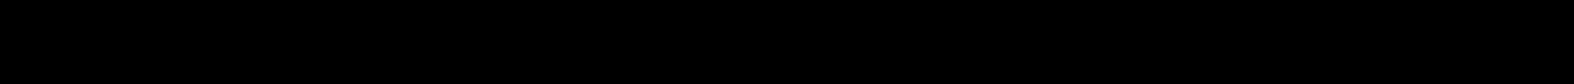

In [75]:
#first i will see all the different memory types:
print(df.Memory.unique())
df["Storage type"] = df["Memory"] #creating a new colum
df["Storage type"] = df["Storage type"].astype(str) #converting the colum to string
df["Storage type"] = df["Storage type"].str.replace(r"^\S+\s*", "", regex = True) #deleting the first word and the space after it
df["Storage type"] = df["Storage type"].str.replace(r"(\+)\s*\S+\s*", r"\1 ", regex = True) #deleting the first word after "+" and the space after that word
print(df["Storage type"].unique()) #for self check

['128GB SSD' '128GB Flash Storage' '256GB SSD' '512GB SSD' '500GB HDD'
 '256GB Flash Storage' '1TB HDD' '32GB Flash Storage'
 '128GB SSD +  1TB HDD' '256GB SSD +  256GB SSD' '64GB Flash Storage'
 '256GB SSD +  1TB HDD' '256GB SSD +  2TB HDD' '32GB SSD' '2TB HDD'
 '64GB SSD' '1.0TB Hybrid' '512GB SSD +  1TB HDD' '1TB SSD'
 '256GB SSD +  500GB HDD' '128GB SSD +  2TB HDD' '512GB SSD +  512GB SSD'
 '16GB SSD' '16GB Flash Storage' '512GB SSD +  256GB SSD'
 '512GB SSD +  2TB HDD' '64GB Flash Storage +  1TB HDD' '180GB SSD'
 '1TB HDD +  1TB HDD' '32GB HDD' '1TB SSD +  1TB HDD'
 '512GB Flash Storage' '128GB HDD' '240GB SSD' '8GB SSD' '508GB Hybrid'
 '1.0TB HDD' '512GB SSD +  1.0TB Hybrid' '256GB SSD +  1.0TB Hybrid']
['SSD' 'Flash Storage' 'HDD' 'SSD + HDD' 'SSD + SSD' 'Hybrid'
 'Flash Storage + HDD' 'HDD + HDD' 'SSD + Hybrid']
0                 SSD
1       Flash Storage
2                 SSD
3                 SSD
4                 SSD
            ...      
1270              SSD
1271          